<a href="https://colab.research.google.com/github/misrapk/Data-Science-ML-Projects/blob/main/HEART_DISEASE_PREDICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q hvplot


In [ ]:
#import some libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import hvplot.pandas

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [ ]:
#read the data
data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


# EDA (Exploratory Data Analysis)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.shape

(303, 14)

In [ ]:
pd.set_option('display.float', '{:.2f}'.format)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [ ]:
#target variables
data.target.value_counts()

,count
target,
1,165
0,138


In [ ]:
data.target.value_counts().hvplot.bar(
    title='Heart Disease Count', xlabel='Heart Disease', ylabel='Count',
    width = 500, height = 300
)

:Bars   [target]   (count)

In [ ]:
#check for null values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


### Observation
1. We have 165 person with disease and 138 without disease
2. we have perfect dataset, with no null values and no missing vaues.

In [ ]:
len(data['cp'].unique())

4

In [ ]:
#separate vategorical and continuous columns
cat_val = []
cont_val = []

for column in data.columns:
  if len(data[column].unique()) <=10:
    cat_val.append(column)
  else:
    cont_val.append(column)

In [ ]:
print("Categorical Columns: ", cat_val)
print("Continuos Columns: ", cont_val)


Categorical Columns:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuos Columns:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [ ]:
#check for disease based on sex

have_disease = data.loc[data['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4)
no_disease = data.loc[data['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4)

(no_disease*have_disease).opts(
    title = 'Heart Disease by Sex',
    xlabel = 'Sex',
    ylabel = 'Count',
    width = 500, height = 450,
    legend_cols = 2,

)


:Overlay
   .Bars.Count.I  :Bars   [sex]   (count)
   .Bars.Count.II :Bars   [sex]   (count)

In [ ]:
#check for disease based on chestpain

have_disease = data.loc[data['target']==1, 'cp'].value_counts().hvplot.bar(alpha=0.4)
no_disease = data.loc[data['target']==0, 'cp'].value_counts().hvplot.bar(alpha=0.4)

(no_disease*have_disease).opts(
    title = 'Heart Disease by Chest Pain',
    xlabel = 'Chest Pain type',
    ylabel = 'Count',
    width = 500, height = 450,
    legend_cols = 2,
    legend_position = 'top_right'

)


:Overlay
   .Bars.Count.I  :Bars   [cp]   (count)
   .Bars.Count.II :Bars   [cp]   (count)

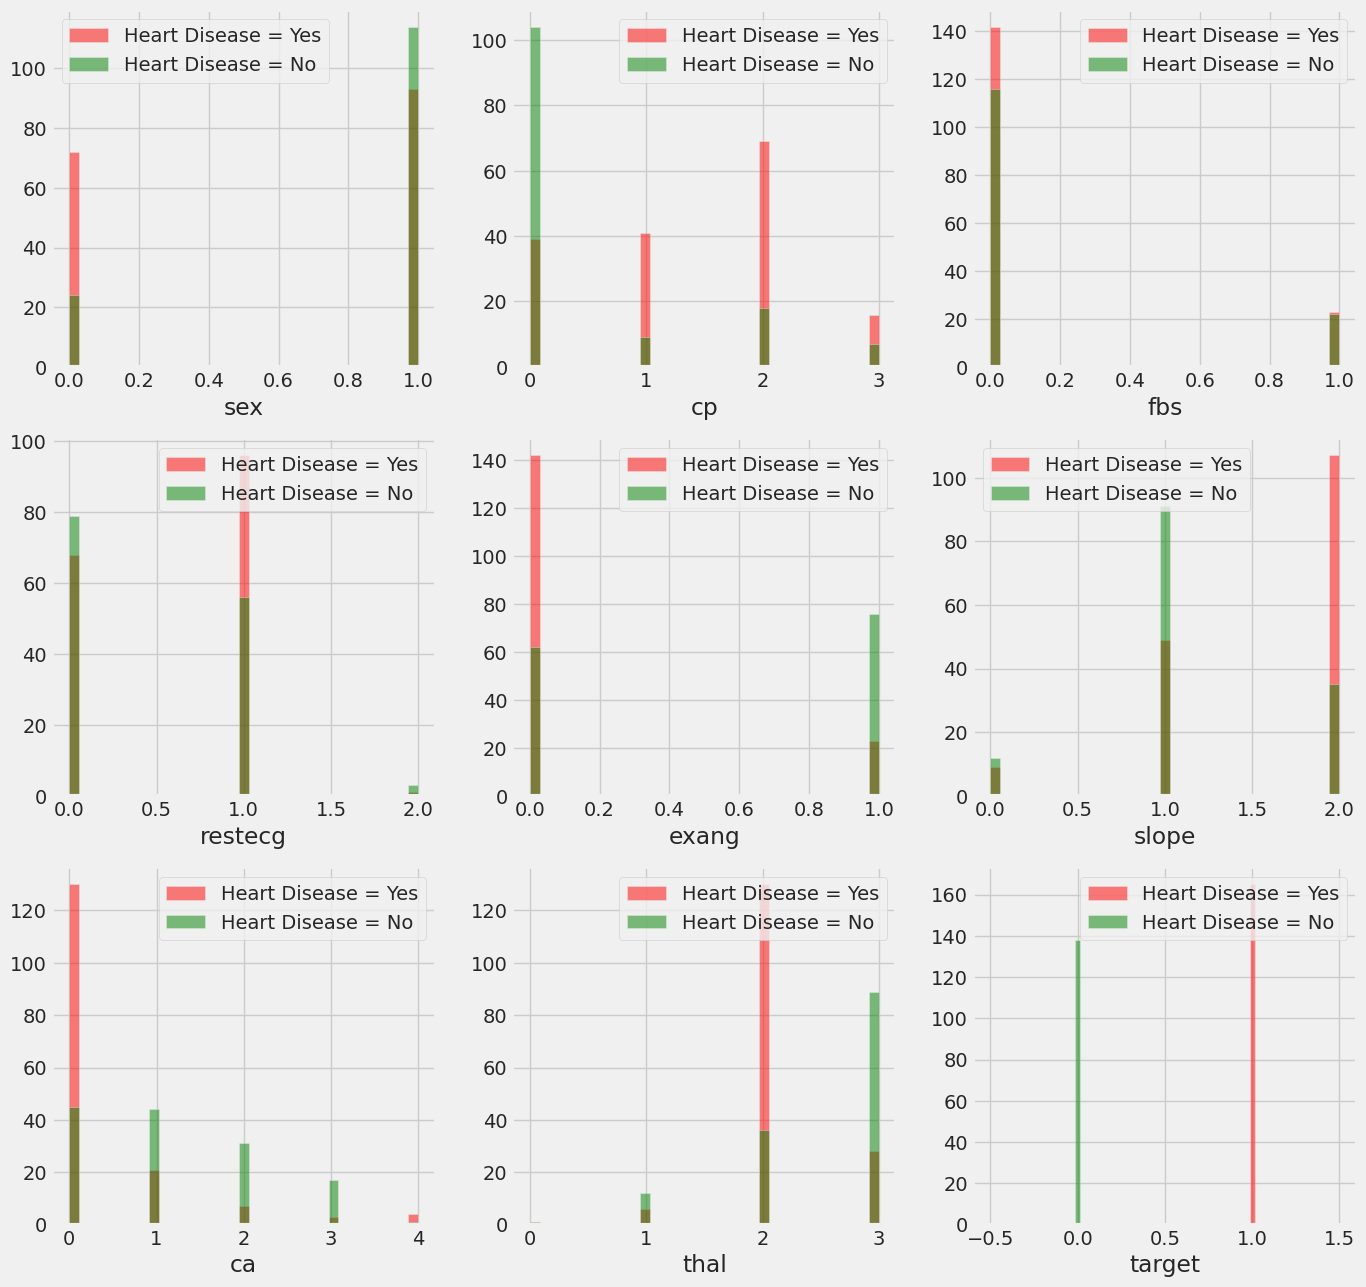

In [ ]:
plt.figure(figsize=(15,15))
for i, column in enumerate(cat_val, 1):
  plt.subplot(3,3,i)
  data[data['target']==1] [column].hist(bins=35, color = 'red', label='Heart Disease = Yes', alpha = 0.5)
  data[data['target']==0] [column].hist(bins=35, color = 'green', label='Heart Disease = No', alpha = 0.5)
  plt.legend()
  plt.xlabel(column)

### Observations
1. Chest pain with 1,2,3 are more likely to have heart disease
2. people with ecg = 1 have non normal heart beat and hence more likely to have heart disease
3. exang (excersie induced angina) people with value 0 have heart disease more than people with value 1
4. people with slope 2 (signs of unhealthy heart) - are more likely to have heart disease
5. ca (no. of major vessel): people with value 0 (means very less blood movement) are more likely to have heart disesase.


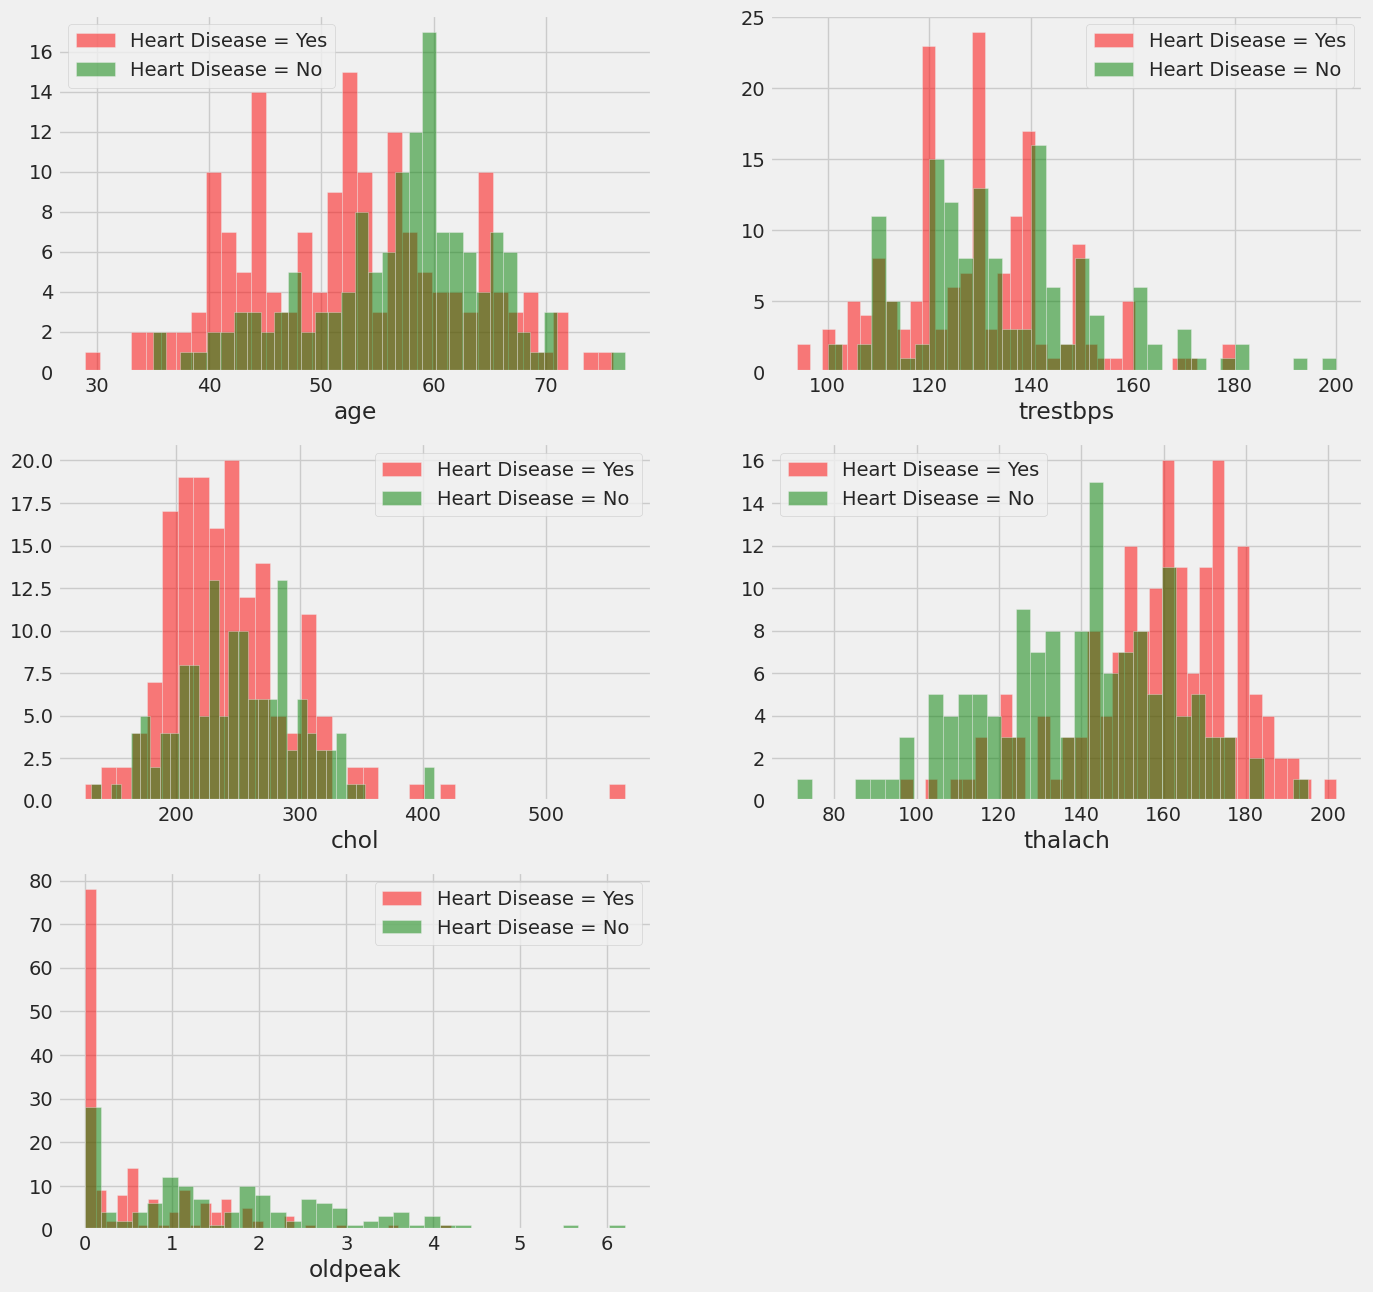

In [ ]:
#visualise for continuous data
plt.figure(figsize=(15,15))
for i, column in enumerate(cont_val, 1):
  plt.subplot(3,2,i)
  data[data['target']==1] [column].hist(bins=35, color = 'red', label='Heart Disease = Yes', alpha = 0.5)
  data[data['target']==0] [column].hist(bins=35, color = 'green', label='Heart Disease = No', alpha = 0.5)
  plt.legend()
  plt.xlabel(column)

### Observation:
home work


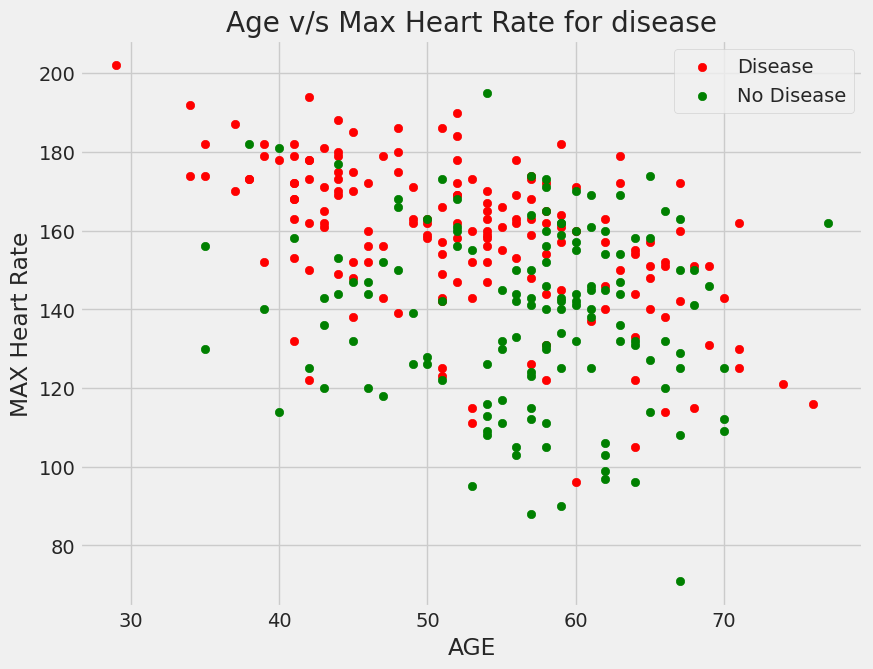

In [ ]:
plt.figure(figsize=(9,7))
plt.scatter(data.age[data.target==1], data.thalach[data.target==1], c = 'red')
plt.scatter(data.age[data.target==0], data.thalach[data.target==0], c = 'green')

plt.title("Age v/s Max Heart Rate for disease")
plt.xlabel("AGE")
plt.ylabel("MAX Heart Rate")
plt.legend(['Disease', 'No Disease'])
plt.show()


(14.5, -0.5)

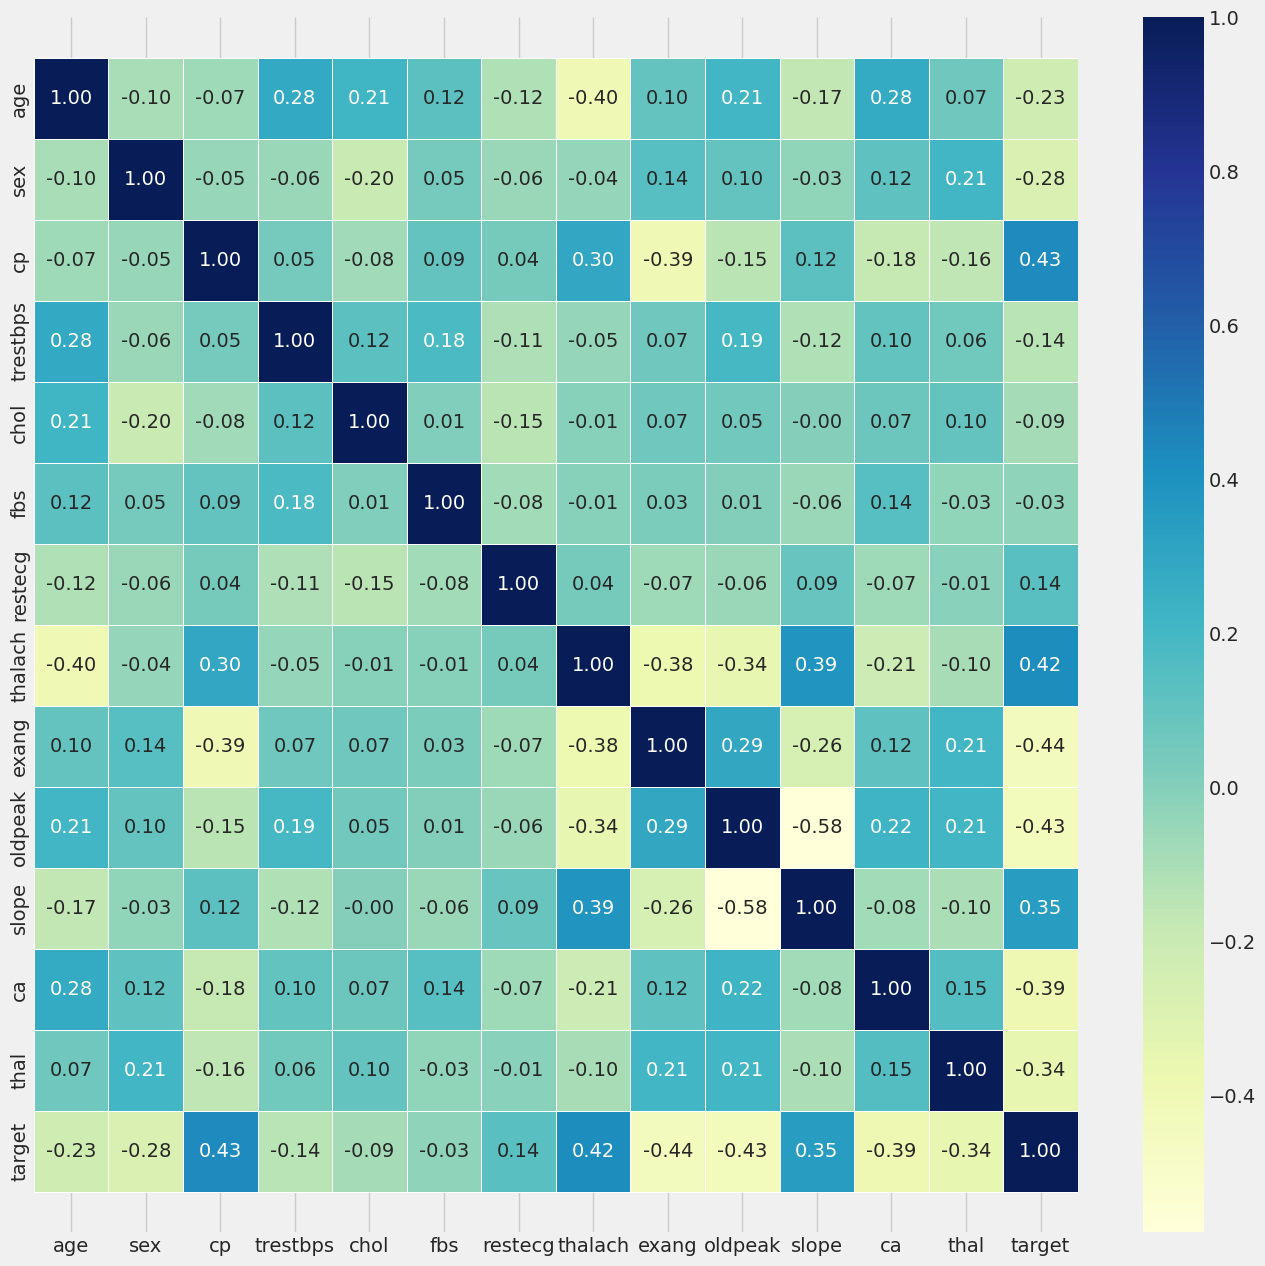

In [ ]:
#correlation matrix

corr_matrix = data.corr()

fig, ax = plt.subplots(figsize=(15,15))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [ ]:
data.drop('target', axis = 1).corrwith(data.target).hvplot.barh(
    width =600, height = 500,
    title ='correlation with target variable',
    xlabel = 'Numerical Features',
    ylabel = 'Correlation'

)

:Bars   [index]   (0)

# Data Preprocessing

1. Convert categorical variables into dummy varialbel
2. scale all the values

In [ ]:
data[cat_val]

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


In [ ]:
#create dummy variables for categorical values
cat_val.remove('target')
df = pd.get_dummies(data, columns= cat_val)

In [ ]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,37,130,250,187,3.50,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,41,130,204,172,1.40,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,56,120,236,178,0.80,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,57,120,354,163,0.60,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [ ]:
print(df.columns)
print(data.columns)

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
# Standard scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scale_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[scale_col] = sc.fit_transform(df[scale_col])
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.95,0.76,-0.26,0.02,1.09,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.92,-0.09,0.07,1.63,2.12,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.47,-0.09,-0.82,0.98,0.31,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.18,-0.66,-0.20,1.24,-0.21,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.29,-0.66,2.08,0.58,-0.38,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [ ]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,303.00,303.00,303.00,303.00,303.00,303.00
mean,0.00,-0.00,-0.00,-0.00,0.00,0.54
std,1.00,1.00,1.00,1.00,1.00,0.50
min,-2.80,-2.15,-2.32,-3.44,-0.90,0.00
25%,-0.76,-0.66,-0.68,-0.71,-0.90,0.00
50%,0.07,-0.09,-0.12,0.15,-0.21,1.00
75%,0.73,0.48,0.55,0.72,0.48,1.00
max,2.50,3.91,6.14,2.29,4.45,1.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   trestbps   303 non-null    float64
 2   chol       303 non-null    float64
 3   thalach    303 non-null    float64
 4   oldpeak    303 non-null    float64
 5   target     303 non-null    int64  
 6   sex_0      303 non-null    bool   
 7   sex_1      303 non-null    bool   
 8   cp_0       303 non-null    bool   
 9   cp_1       303 non-null    bool   
 10  cp_2       303 non-null    bool   
 11  cp_3       303 non-null    bool   
 12  fbs_0      303 non-null    bool   
 13  fbs_1      303 non-null    bool   
 14  restecg_0  303 non-null    bool   
 15  restecg_1  303 non-null    bool   
 16  restecg_2  303 non-null    bool   
 17  exang_0    303 non-null    bool   
 18  exang_1    303 non-null    bool   
 19  slope_0    303 non-null    bool   
 20  slope_1   

# Model Building

In [ ]:
# split dataset into train and testing
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [ ]:
print("X_TRAIN: ", X_train.shape)
print("X_TEST: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)


X_TRAIN:  (212, 30)
X_TEST:  (91, 30)
y_train:  (212,)
y_test:  (91,)


##### List of Clasification algo
1. Logisitic
2. KNN
3. SVM
4. DT
5. RF
6. XGBOOST

In [ ]:
# function to show the model accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def show_score(clf, X_train, y_train, X_test, y_test, train = True):
  if train:
    pred = clf.predict(X_train)
    clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
    print("TRAINING RESULT : \n----------------------")
    print("Accuracy Score: ", accuracy_score(y_train, pred)*100)
    print("\nClassification Report \n: ", clf_report)
    print("Confusion Matrix: \n", confusion_matrix(y_train, pred))

  else:
    pred = clf.predict(X_test)
    clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
    print("Testing RESULT : \n----------------------")
    print("Accuracy Score: ", accuracy_score(y_test, pred)*100)
    print("\nClassification Report \n: ", clf_report)
    print("Confusion Matrix: \n", confusion_matrix(y_test, pred))

# 1 Logisitc Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
show_score(lr, X_train, y_train, X_test, y_test, train=True)
show_score(lr, X_train, y_train, X_test, y_test, train=False)


TRAINING RESULT : 
----------------------
Accuracy Score:  86.32075471698113

Classification Report 
:                0      1  accuracy  macro avg  weighted avg
precision  0.87   0.86      0.86       0.86          0.86
recall     0.82   0.90      0.86       0.86          0.86
f1-score   0.85   0.88      0.86       0.86          0.86
support   97.00 115.00      0.86     212.00        212.00
Confusion Matrix: 
 [[ 80  17]
 [ 12 103]]
Testing RESULT : 
----------------------
Accuracy Score:  86.81318681318682

Classification Report 
:                0     1  accuracy  macro avg  weighted avg
precision  0.94  0.83      0.87       0.88          0.88
recall     0.76  0.96      0.87       0.86          0.87
f1-score   0.84  0.89      0.87       0.86          0.87
support   41.00 50.00      0.87      91.00         91.00
Confusion Matrix: 
 [[31 10]
 [ 2 48]]


In [ ]:
test_score = accuracy_score(y_test, lr.predict(X_test))*100
train_score = accuracy_score(y_train, lr.predict(X_train))*100

resultDf = pd.DataFrame(data = [['Logisitc Regression', train_score, test_score]],
             columns = ['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
resultDf

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logisitc Regression,86.32,86.81


# K Nearest Neigbor KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

show_score(knn, X_train, y_train, X_test, y_test, train=True)
show_score(knn, X_train, y_train, X_test, y_test, train=False)


TRAINING RESULT : 
----------------------
Accuracy Score:  86.79245283018868

Classification Report 
:                0      1  accuracy  macro avg  weighted avg
precision  0.90   0.85      0.87       0.87          0.87
recall     0.80   0.92      0.87       0.86          0.87
f1-score   0.85   0.88      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
Confusion Matrix: 
 [[ 78  19]
 [  9 106]]
Testing RESULT : 
----------------------
Accuracy Score:  89.01098901098901

Classification Report 
:                0     1  accuracy  macro avg  weighted avg
precision  0.94  0.86      0.89       0.90          0.90
recall     0.80  0.96      0.89       0.88          0.89
f1-score   0.87  0.91      0.89       0.89          0.89
support   41.00 50.00      0.89      91.00         91.00
Confusion Matrix: 
 [[33  8]
 [ 2 48]]


In [ ]:
test_score = accuracy_score(y_test, knn.predict(X_test))*100
train_score = accuracy_score(y_train, knn.predict(X_train))*100

resultDf2 = pd.DataFrame(data = [['KNN Model', train_score, test_score]],
             columns = ['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
resultDf = pd.concat([resultDf, resultDf2], ignore_index = True)
resultDf

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logisitc Regression,86.32,86.81
1,KNN Model,86.79,89.01


# SVM

In [ ]:
from sklearn.svm import SVC

sc = SVC(kernel = 'rbf', gamma=0.1, C =1.0)
sc.fit(X_train, y_train)
show_score(sc, X_train, y_train, X_test, y_test, train=True)
show_score(sc, X_train, y_train, X_test, y_test, train=False)


TRAINING RESULT : 
----------------------
Accuracy Score:  91.0377358490566

Classification Report 
:                0      1  accuracy  macro avg  weighted avg
precision  0.94   0.89      0.91       0.92          0.91
recall     0.86   0.96      0.91       0.91          0.91
f1-score   0.90   0.92      0.91       0.91          0.91
support   97.00 115.00      0.91     212.00        212.00
Confusion Matrix: 
 [[ 83  14]
 [  5 110]]
Testing RESULT : 
----------------------
Accuracy Score:  87.91208791208791

Classification Report 
:                0     1  accuracy  macro avg  weighted avg
precision  0.94  0.84      0.88       0.89          0.89
recall     0.78  0.96      0.88       0.87          0.88
f1-score   0.85  0.90      0.88       0.88          0.88
support   41.00 50.00      0.88      91.00         91.00
Confusion Matrix: 
 [[32  9]
 [ 2 48]]


In [ ]:
test_score = accuracy_score(y_test, sc.predict(X_test))*100
train_score = accuracy_score(y_train, sc.predict(X_train))*100

resultDf2 = pd.DataFrame(data = [['SVM', train_score, test_score]],
             columns = ['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
resultDf = pd.concat([resultDf, resultDf2], ignore_index = True)
resultDf

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logisitc Regression,86.32,86.81
1,KNN Model,86.79,89.01
2,SVM,91.04,87.91


# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
show_score(dt, X_train, y_train, X_test, y_test, train=True)
show_score(dt, X_train, y_train, X_test, y_test, train=False)



TRAINING RESULT : 
----------------------
Accuracy Score:  100.0

Classification Report 
:                0      1  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   97.00 115.00      1.00     212.00        212.00
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]
Testing RESULT : 
----------------------
Accuracy Score:  73.62637362637363

Classification Report 
:                0     1  accuracy  macro avg  weighted avg
precision  0.72  0.75      0.74       0.73          0.74
recall     0.68  0.78      0.74       0.73          0.74
f1-score   0.70  0.76      0.74       0.73          0.74
support   41.00 50.00      0.74      91.00         91.00
Confusion Matrix: 
 [[28 13]
 [11 39]]


In [ ]:
test_score = accuracy_score(y_test, dt.predict(X_test))*100
train_score = accuracy_score(y_train, dt.predict(X_train))*100

resultDf2 = pd.DataFrame(data = [['Decision Tree', train_score, test_score]],
             columns = ['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
resultDf = pd.concat([resultDf, resultDf2], ignore_index = True)
resultDf

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logisitc Regression,86.32,86.81
1,KNN Model,86.79,89.01
2,SVM,91.04,87.91
3,Decision Tree,100.00,73.63


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=42)

rf.fit(X_train, y_train)
show_score(rf, X_train, y_train, X_test, y_test, train=True)
show_score(rf, X_train, y_train, X_test, y_test, train=False)


TRAINING RESULT : 
----------------------
Accuracy Score:  100.0

Classification Report 
:                0      1  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   97.00 115.00      1.00     212.00        212.00
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]
Testing RESULT : 
----------------------
Accuracy Score:  85.71428571428571

Classification Report 
:                0     1  accuracy  macro avg  weighted avg
precision  0.91  0.82      0.86       0.87          0.86
recall     0.76  0.94      0.86       0.85          0.86
f1-score   0.83  0.88      0.86       0.85          0.86
support   41.00 50.00      0.86      91.00         91.00
Confusion Matrix: 
 [[31 10]
 [ 3 47]]


In [ ]:
test_score = accuracy_score(y_test, rf.predict(X_test))*100
train_score = accuracy_score(y_train, rf.predict(X_train))*100

resultDf2 = pd.DataFrame(data = [['Random Forest Classifier', train_score, test_score]],
             columns = ['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
resultDf = pd.concat([resultDf, resultDf2], ignore_index = True)
resultDf

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logisitc Regression,86.32,86.81
1,KNN Model,86.79,89.01
2,SVM,91.04,87.91
3,Decision Tree,100.00,73.63
4,Random Forest Classifier,100.00,85.71


# 6. XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

show_score(xgb, X_train, y_train, X_test, y_test, train=True)
show_score(xgb, X_train, y_train, X_test, y_test, train=False)


TRAINING RESULT : 
----------------------
Accuracy Score:  100.0

Classification Report 
:                0      1  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   97.00 115.00      1.00     212.00        212.00
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]
Testing RESULT : 
----------------------
Accuracy Score:  82.41758241758241

Classification Report 
:                0     1  accuracy  macro avg  weighted avg
precision  0.88  0.79      0.82       0.84          0.83
recall     0.71  0.92      0.82       0.81          0.82
f1-score   0.78  0.85      0.82       0.82          0.82
support   41.00 50.00      0.82      91.00         91.00
Confusion Matrix: 
 [[29 12]
 [ 4 46]]


In [ ]:
test_score = accuracy_score(y_test, xgb.predict(X_test))*100
train_score = accuracy_score(y_train, xgb.predict(X_train))*100

resultDf2 = pd.DataFrame(data = [['XGBOOST Classifier', train_score, test_score]],
             columns = ['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
resultDf = pd.concat([resultDf, resultDf2], ignore_index = True)
resultDf

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logisitc Regression,86.32,86.81
1,KNN Model,86.79,89.01
2,SVM,91.04,87.91
3,Decision Tree,100.00,73.63
4,Random Forest Classifier,100.00,85.71
5,XGBOOST Classifier,100.00,82.42


# HYPER PARAMETER TUNNING
using GRIDSEARCH CV to make a better model with high accuracy

In [ ]:
# logistic Regression
from sklearn.model_selection  import GridSearchCV

In [ ]:
params = {"C": np.logspace(-4,4,20),
          "solver":['liblinear','lbfg', 'newton-cg']}

lr = LogisticRegression()
lr_cv = GridSearchCV(lr, params, scoring='accuracy', n_jobs=1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'lbfg', 'newton-cg']},
             scoring='accuracy', verbose=1)

In [ ]:
lr_cv.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [ ]:
lr = LogisticRegression(**lr_cv.best_params_)
lr.fit(X_train, y_train)


LogisticRegression(C=1.623776739188721, solver='liblinear')

In [ ]:
show_score(lr, X_train, y_train, X_test, y_test, train=True)
show_score(lr, X_train, y_train, X_test, y_test, train=False)


TRAINING RESULT : 
----------------------
Accuracy Score:  86.79245283018868

Classification Report 
:                0      1  accuracy  macro avg  weighted avg
precision  0.89   0.85      0.87       0.87          0.87
recall     0.81   0.91      0.87       0.86          0.87
f1-score   0.85   0.88      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
Confusion Matrix: 
 [[ 79  18]
 [ 10 105]]
Testing RESULT : 
----------------------
Accuracy Score:  86.81318681318682

Classification Report 
:                0     1  accuracy  macro avg  weighted avg
precision  0.94  0.83      0.87       0.88          0.88
recall     0.76  0.96      0.87       0.86          0.87
f1-score   0.84  0.89      0.87       0.86          0.87
support   41.00 50.00      0.87      91.00         91.00
Confusion Matrix: 
 [[31 10]
 [ 2 48]]


In [ ]:
test_score = accuracy_score(y_test, lr.predict(X_test))*100
train_score = accuracy_score(y_train, lr.predict(X_train))*100

tuningResult = pd.DataFrame(data = [['Logistic Regression', train_score, test_score]],
             columns = ['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
# resultDf = pd.concat([resultDf, resultDf2], ignore_index = True)
tuningResult

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,86.79,86.81


In [ ]:
# KNN
train_score = []
test_score = []

neighbors = range(1,40)
for k in neighbors:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  train_score.append(accuracy_score(y_train, model.predict(X_train)))
  test_score.append(accuracy_score(y_test, model.predict(X_test)))


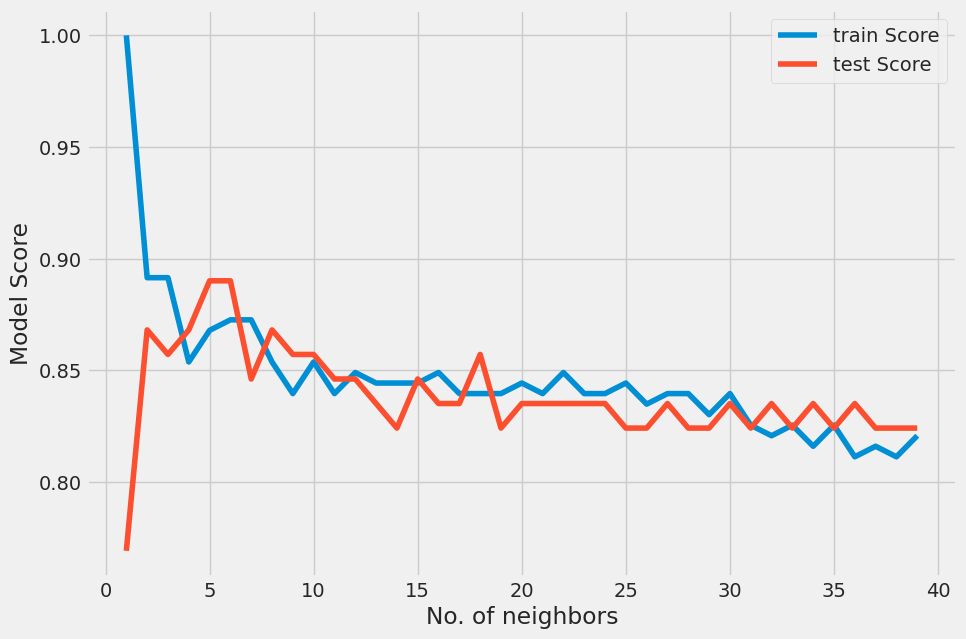

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(neighbors, train_score, label='train Score')
plt.plot(neighbors, test_score, label='test Score')

plt.xlabel("No. of neighbors")
plt.ylabel("Model Score")
plt.legend()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)

show_score(knn, X_train, y_train, X_test, y_test, train=True)
show_score(knn, X_train, y_train, X_test, y_test, train=False)


TRAINING RESULT : 
----------------------
Accuracy Score:  83.9622641509434

Classification Report 
:                0      1  accuracy  macro avg  weighted avg
precision  0.86   0.82      0.84       0.84          0.84
recall     0.77   0.90      0.84       0.83          0.84
f1-score   0.82   0.86      0.84       0.84          0.84
support   97.00 115.00      0.84     212.00        212.00
Confusion Matrix: 
 [[ 75  22]
 [ 12 103]]
Testing RESULT : 
----------------------
Accuracy Score:  85.71428571428571

Classification Report 
:                0     1  accuracy  macro avg  weighted avg
precision  0.91  0.82      0.86       0.87          0.86
recall     0.76  0.94      0.86       0.85          0.86
f1-score   0.83  0.88      0.86       0.85          0.86
support   41.00 50.00      0.86      91.00         91.00
Confusion Matrix: 
 [[31 10]
 [ 3 47]]


In [ ]:
test_score = accuracy_score(y_test, knn.predict(X_test))*100
train_score = accuracy_score(y_train, knn.predict(X_train))*100

tuningResult2 = pd.DataFrame(data = [['KNN Model', train_score, test_score]],
             columns = ['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
tuningResult = pd.concat([tuningResult, tuningResult2], ignore_index = True)
tuningResult

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,86.79,86.81
1,KNN Model,83.96,85.71


## SVm

In [ ]:
sc = SVC(kernel = 'rbf', gamma=0.1, C =1.0)

params= {"C": (0.1, 0.5, 1,2,5, 10,20),
         "gamma": (0.001, 0.01, 0.1, 0.25,0.5,1),
         "kernel": ('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(sc, params, scoring='accuracy', n_jobs=-1, verbose=1, cv=5)
svm_cv.fit(X_train,y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=5, estimator=SVC(gamma=0.1), n_jobs=-1,
             param_grid={'C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 1),
                         'kernel': ('linear', 'poly', 'rbf')},
             scoring='accuracy', verbose=1)

In [ ]:
best_params = svm_cv.best_params_
print("BEST PARAMS: ", best_params)

sc = SVC(**best_params)
sc.fit(X_train, y_train)
show_score(sc, X_train, y_train, X_test, y_test, train=True)
show_score(sc, X_train, y_train, X_test, y_test, train=False)


BEST PARAMS:  {'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}
TRAINING RESULT : 
----------------------
Accuracy Score:  84.90566037735849

Classification Report 
:                0      1  accuracy  macro avg  weighted avg
precision  0.91   0.81      0.85       0.86          0.86
recall     0.74   0.94      0.85       0.84          0.85
f1-score   0.82   0.87      0.85       0.84          0.85
support   97.00 115.00      0.85     212.00        212.00
Confusion Matrix: 
 [[ 72  25]
 [  7 108]]
Testing RESULT : 
----------------------
Accuracy Score:  83.51648351648352

Classification Report 
:                0     1  accuracy  macro avg  weighted avg
precision  0.93  0.79      0.84       0.86          0.85
recall     0.68  0.96      0.84       0.82          0.84
f1-score   0.79  0.86      0.84       0.83          0.83
support   41.00 50.00      0.84      91.00         91.00
Confusion Matrix: 
 [[28 13]
 [ 2 48]]


In [ ]:
test_score = accuracy_score(y_test, sc.predict(X_test))*100
train_score = accuracy_score(y_train, sc.predict(X_train))*100

tuningResult2 = pd.DataFrame(data = [['SVM', train_score, test_score]],
             columns = ['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
tuningResult = pd.concat([tuningResult, tuningResult2], ignore_index = True)
tuningResult

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,86.79,86.81
1,KNN Model,83.96,85.71
2,SVM,84.91,83.52


## DT

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
show_score(dt, X_train, y_train, X_test, y_test, train=True)
show_score(dt, X_train, y_train, X_test, y_test, train=False)


In [ ]:
params = {
    'criterion': ("ginni", "entropy", "log_loss"),
    'splitter' : ('best', 'random'),
    'max_depth':(list(range(1,20))),
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':list(range(1,20))
}

dt =  DecisionTreeClassifier(random_state = 42)
tree_cv = GridSearchCV(dt, params, scoring='accuracy', n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8664 candidates, totalling 43320 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
14440 fits failed out of a total of 43320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7219 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ('ginni', 'entropy', 'log_loss'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=1)

In [ ]:
best_params = tree_cv.best_params_
print("BEST PARAMS: ", best_params)

dt = DecisionTreeClassifier(**best_params)
dt.fit(X_train, y_train)
show_score(dt, X_train, y_train, X_test, y_test, train=True)
show_score(dt, X_train, y_train, X_test, y_test, train=False)


BEST PARAMS:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'best'}
TRAINING RESULT : 
----------------------
Accuracy Score:  86.32075471698113

Classification Report 
:                0      1  accuracy  macro avg  weighted avg
precision  0.86   0.86      0.86       0.86          0.86
recall     0.84   0.89      0.86       0.86          0.86
f1-score   0.85   0.88      0.86       0.86          0.86
support   97.00 115.00      0.86     212.00        212.00
Confusion Matrix: 
 [[ 81  16]
 [ 13 102]]
Testing RESULT : 
----------------------
Accuracy Score:  78.02197802197803

Classification Report 
:                0     1  accuracy  macro avg  weighted avg
precision  0.82  0.76      0.78       0.79          0.79
recall     0.66  0.88      0.78       0.77          0.78
f1-score   0.73  0.81      0.78       0.77          0.78
support   41.00 50.00      0.78      91.00         91.00
Confusion Matrix: 
 [[27 14]
 [ 6 44]]


In [ ]:
test_score = accuracy_score(y_test, dt.predict(X_test))*100
train_score = accuracy_score(y_train, dt.predict(X_train))*100

tuningResult2 = pd.DataFrame(data = [['Decision Tree', train_score, test_score]],
             columns = ['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
tuningResult = pd.concat([tuningResult, tuningResult2], ignore_index = True)
tuningResult

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,86.79,86.81
1,KNN Model,83.96,85.71
2,SVM,84.91,83.52
3,Decision Tree,86.32,78.02


## Random Forest


In [ ]:
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf = RandomForestClassifier( random_state=42)
rf_cv = GridSearchCV(rf, params_grid, cv = 5, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
792 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ut

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 15, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [500, 900, 1100, 1500]},
             verbose=1)

In [ ]:
best_params = rf_cv.best_params_
print("BEST PARAMS: ", best_params)

rf = RandomForestClassifier(**best_params)
rf.fit(X_train, y_train)
show_score(rf, X_train, y_train, X_test, y_test, train=True)
show_score(rf, X_train, y_train, X_test, y_test, train=False)


BEST PARAMS:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 900}
TRAINING RESULT : 
----------------------
Accuracy Score:  91.50943396226415

Classification Report 
:                0      1  accuracy  macro avg  weighted avg
precision  0.95   0.89      0.92       0.92          0.92
recall     0.86   0.97      0.92       0.91          0.92
f1-score   0.90   0.93      0.92       0.91          0.91
support   97.00 115.00      0.92     212.00        212.00
Confusion Matrix: 
 [[ 83  14]
 [  4 111]]
Testing RESULT : 
----------------------
Accuracy Score:  85.71428571428571

Classification Report 
:                0     1  accuracy  macro avg  weighted avg
precision  0.94  0.81      0.86       0.88          0.87
recall     0.73  0.96      0.86       0.85          0.86
f1-score   0.82  0.88      0.86       0.85          0.85
support   41.00 50.00      0.86      91.00         91.00
Confusion Matrix: 
 [[30 11]
 [ 2 48]]


In [ ]:
test_score = accuracy_score(y_test, rf.predict(X_test))*100
train_score = accuracy_score(y_train, rf.predict(X_train))*100

tuningResult2 = pd.DataFrame(data = [['Random Forest', train_score, test_score]],
             columns = ['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
tuningResult = pd.concat([tuningResult, tuningResult2], ignore_index = True)
tuningResult

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,86.79,86.81
1,KNN Model,83.96,85.71
2,SVM,84.91,83.52
3,Decision Tree,86.32,78.02
4,Random Forest,91.51,85.71


## XGBOOST TUNING

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

xgb = XGBClassifier(use_label_encoder=False)
xgb_cv = GridSearchCV(
    xgb, param_grid, cv=5,
    scoring='accuracy', n_jobs=-1, verbose=1
)
xgb_cv.fit(X_train, y_train)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:12:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 200, 500, 1000]},
             scoring='accuracy', verbose=1)

In [ ]:
best_params = xgb_cv.best_params_
print("BEST PARAMS: ", best_params)

xgb = XGBClassifier(**best_params)
xgb.fit(X_train, y_train)
show_score(xgb, X_train, y_train, X_test, y_test, train=True)
show_score(xgb, X_train, y_train, X_test, y_test, train=False)


BEST PARAMS:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
TRAINING RESULT : 
----------------------
Accuracy Score:  87.26415094339622

Classification Report 
:                0      1  accuracy  macro avg  weighted avg
precision  0.90   0.85      0.87       0.88          0.87
recall     0.81   0.92      0.87       0.87          0.87
f1-score   0.85   0.89      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
Confusion Matrix: 
 [[ 79  18]
 [  9 106]]
Testing RESULT : 
----------------------
Accuracy Score:  76.92307692307693

Classification Report 
:                0     1  accuracy  macro avg  weighted avg
precision  0.83  0.74      0.77       0.79          0.78
recall     0.61  0.90      0.77       0.75          0.77
f1-score   0.70  0.81      0.77       0.76          0.76
support   41.00 50.00      0.77      91.00         91.00
Confusion Matrix: 
 [[25 16]
 [ 5 45]]


In [ ]:
test_score = accuracy_score(y_test, xgb.predict(X_test))*100
train_score = accuracy_score(y_train, xgb.predict(X_train))*100

tuningResult2 = pd.DataFrame(data = [['XGBOOST Classifier', train_score, test_score]],
             columns = ['Model', 'Training Accuracy(%)', 'Testing Accuracy(%)'])
tuningResult = pd.concat([tuningResult, tuningResult2], ignore_index = True)
tuningResult

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,86.79,86.81
1,KNN Model,83.96,85.71
2,SVM,84.91,83.52
3,Decision Tree,86.32,78.02
4,Random Forest,91.51,85.71
5,XGBOOST Classifier,87.26,76.92


In [ ]:
resultDf

,Model,Training Accuracy(%),Testing Accuracy(%)
0,Logisitc Regression,86.32,86.81
1,KNN Model,86.79,89.01
2,SVM,91.04,87.91
3,Decision Tree,100.00,73.63
4,Random Forest Classifier,100.00,85.71
5,XGBOOST Classifier,100.00,82.42


In [ ]:
# Feature importnatce

def featureImportance (df, model):
  fi = pd.DataFrame()
  fi["feature"] = df.columns
  fi['importance '] = model.feature_importances_
  return fi

      feature  importance 
0         age         0.05
1    trestbps         0.03
2        chol         0.03
3     thalach         0.08
4     oldpeak         0.10
5       sex_0         0.02
6       sex_1         0.01
7        cp_0         0.13
8        cp_1         0.01
9        cp_2         0.04
10       cp_3         0.00
11      fbs_0         0.00
12      fbs_1         0.00
13  restecg_0         0.01
14  restecg_1         0.01
15  restecg_2         0.00
16    exang_0         0.05
17    exang_1         0.05
18    slope_0         0.00
19    slope_1         0.03
20    slope_2         0.07
21       ca_0         0.09
22       ca_1         0.01
23       ca_2         0.01
24       ca_3         0.00
25       ca_4         0.00
26     thal_0         0.00
27     thal_1         0.00
28     thal_2         0.09
29     thal_3         0.07


<Axes: >

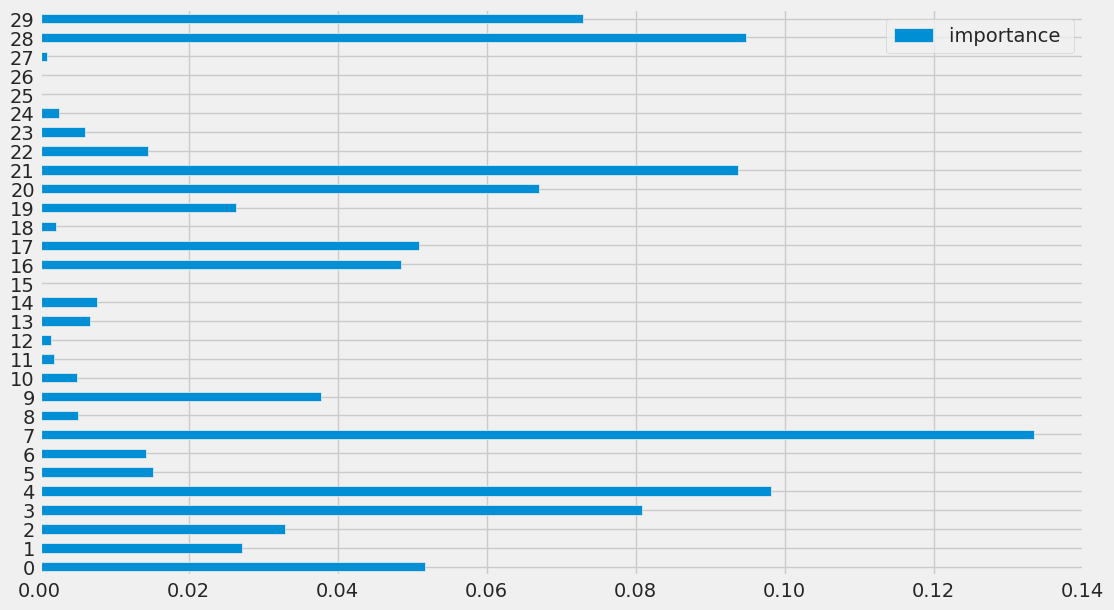

In [ ]:
print(featureImportance(X,rf))
featureImportance(X, rf).plot(kind='barh', figsize=(12,7))